In [1]:
!pip install pandas matplotlib seaborn numpy


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure and no total charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
# Checkin null values 
df.isnull().sum().sum() 

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# checking duplicate on the basis of unique value
df["customerID"].duplicated().sum()

np.int64(0)

In [8]:
# changing the 0 and 1 in senior citizen in yes or no by creating fun
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [9]:
# df.head(30)

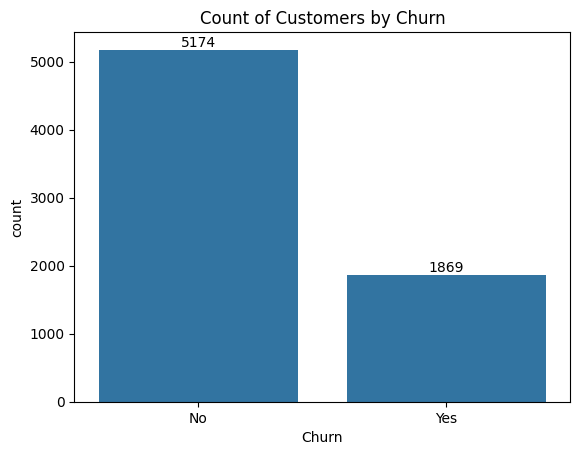

In [10]:

ax = sns.countplot(x ='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

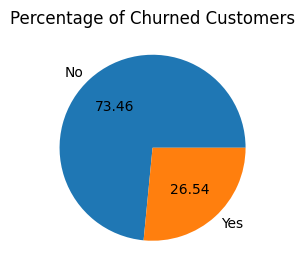

In [11]:
plt.figure(figsize = (3,4))
grp = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(grp['Churn'],labels = grp.index, autopct ="%1.2f")
plt.title("Percentage of Churned Customers")
plt.show

# from the given pie chart we can coclude that 26.54 customers have churned out.Now let's find the reason

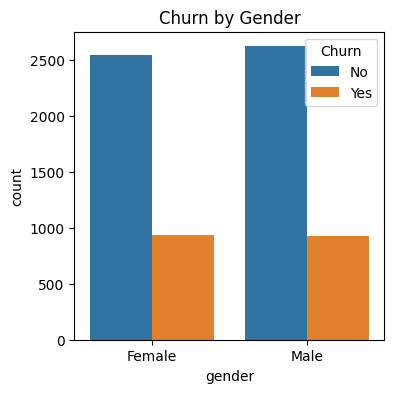

In [12]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

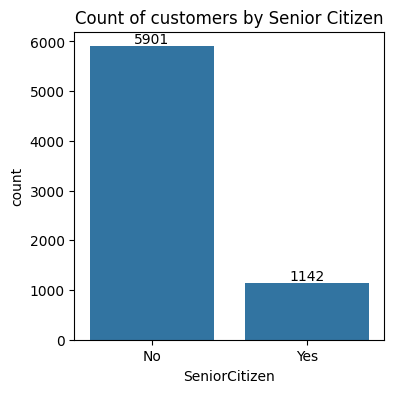

In [17]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizen")

plt.show()

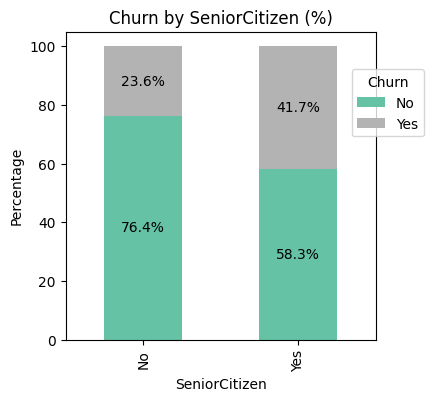

In [19]:
# Create a crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100

# Plot stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(4,4), colormap="Set2")

# Add percentage labels
for c in ax.containers:
    ax.bar_label(c, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (%)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title="Churn",bbox_to_anchor = (0.9,0.9))
plt.show()

# Comparrative a greated percentage of people in senior citizen category have churned

Text(0.5, 1.0, 'Churn by Tenure ')

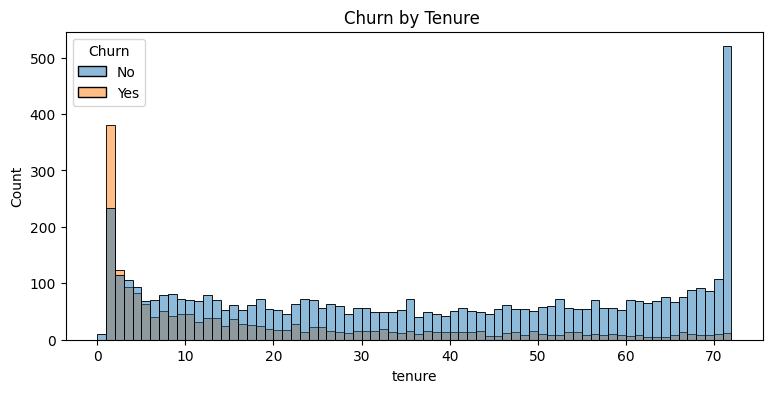

In [26]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure",data = df,bins = 72,hue = 'Churn')
plt.title("Churn by Tenure ")



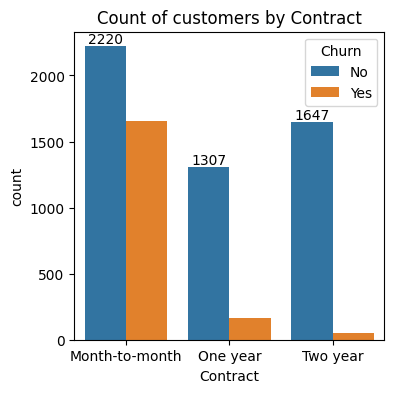

In [28]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")

plt.show()

In [34]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

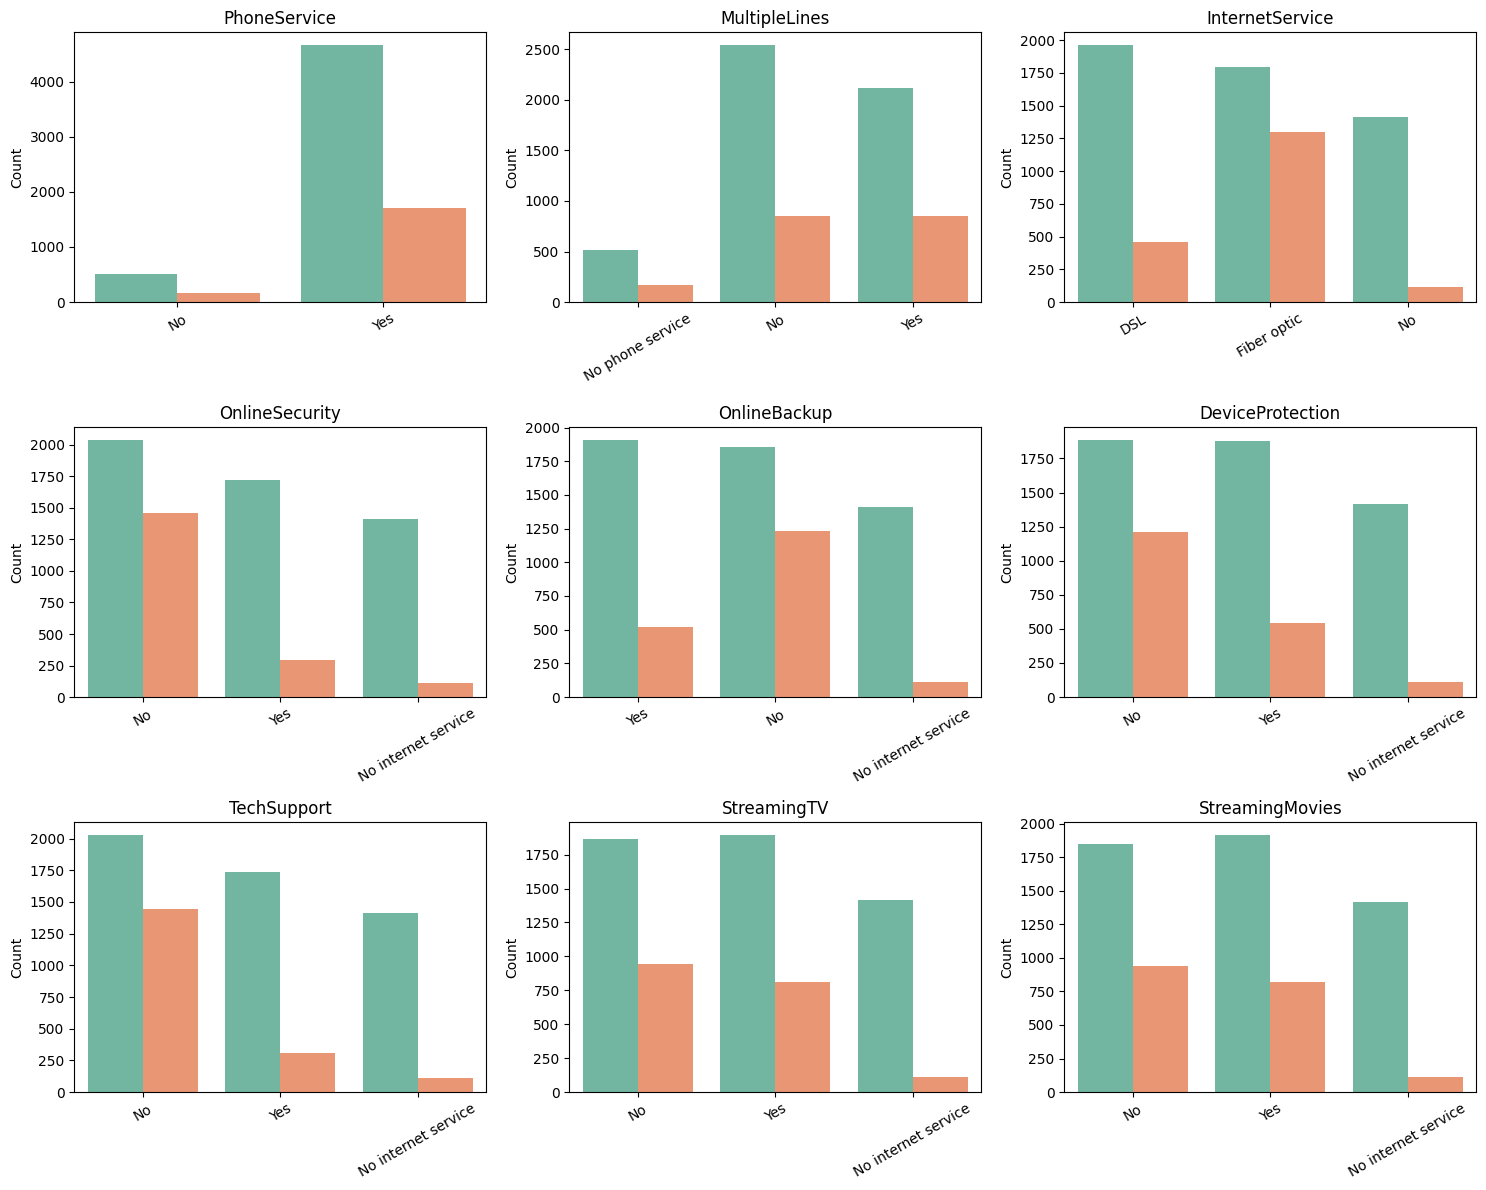

In [37]:
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(x=col, data=df, hue=df["Churn"], palette="Set2", legend=False)  
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# The provided image displays a series of bar plots, likely from a telecommunications or service provider dataset, showing the distribution of customer subscription to various services. 

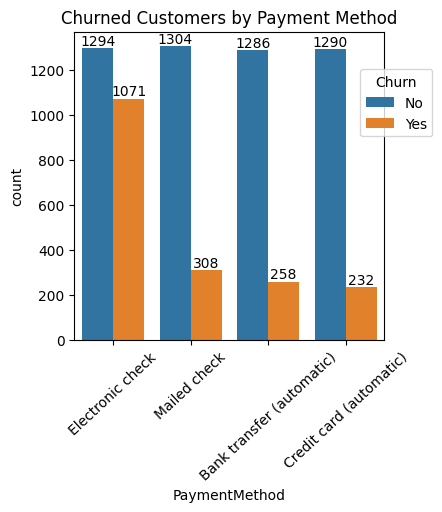

In [41]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 43)
plt.legend(title="Churn",bbox_to_anchor = (0.9,0.9))

plt.show()

# Customer is likely to churn when he is using electronic checks as a payment method